In [120]:
from scipy.stats import spearmanr, pearsonr, kendalltau
from statistics import mean
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# notebook for experiment to get inter-RM correlations (measure of distribution shift) at different stages of PPO
def load_jsons(basedir="../../outputs/ultrarmscos/"):
    adicts = {}
    for l in os.listdir(basedir):
        kv = l.split("_")
        #print(kv)
        if kv[0] not in adicts.keys():
            adicts[kv[0]] = {}
        tmp = pd.read_json(basedir+l, orient='records', lines=True)
        if "dpo" in kv[1]:
            tmp['scores'] = [[mean(s) for s in row] for row in tmp['scores']]
        adicts[kv[0]][kv[1].replace(".jsonl", "")] = tmp
        
            
    return adicts

alldata = load_jsons()

In [124]:
def valspear(subdict, comp):
    corrs = {}
    for k in subdict.keys():
        if comp==k:
            continue
        #print(len(subdict))
        corr = [spearmanr(subdict[k]['scores'][i], subdict[comp]['scores'][i]).statistic for i in range(len(subdict[comp]))]
        corr = np.nanmean(corr)
        #print(k, " ", comp, " : ", corr)
        corrs[k] = corr
    return corrs

ks = ['sft', 'u25', 'u50', 'u75', 'u100']
def corrlines(dct, comp):
    covals = {}
    for k in dct['u25'].keys():
        if k not in comp:
            covals[k] = []
    for u in ks:
        tmpdists = valspear(dct[u], comp)
        for t in tmpdists.keys():
            covals[t].append(tmpdists[t])
    return covals
    

In [125]:
def comp_plot(base):
    cdists = corrlines(alldata, base)
    x = [0, 25, 50, 75, 100]
    # Plot each line
    for key in cdists:
        plt.plot(x, cdists[key], label=key)
    
    # Adding labels and title
    plt.xlabel('Train Steps')
    plt.ylabel('Mean Spearman Correlation')
    plt.title('Correlations vs '+base+" over training")
    plt.legend()
    
    # Show the plot
    plt.show()

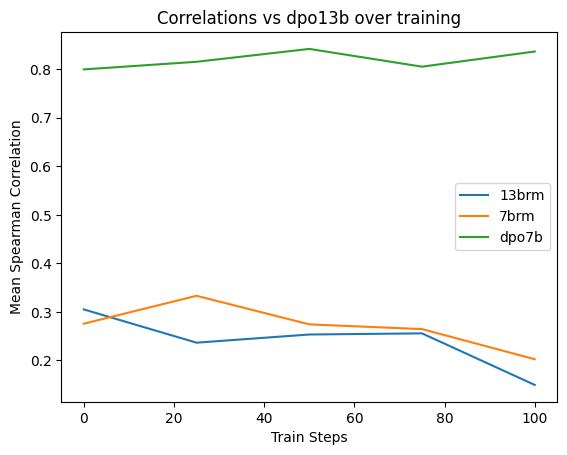

In [130]:
comp_plot("dpo13b")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0.2 , 0.26, 0.32, 0.38, 0.44, 0.5 , 0.56, 0.62, 0.68, 0.74, 0.8 ]),
 <BarContainer object of 10 artists>)

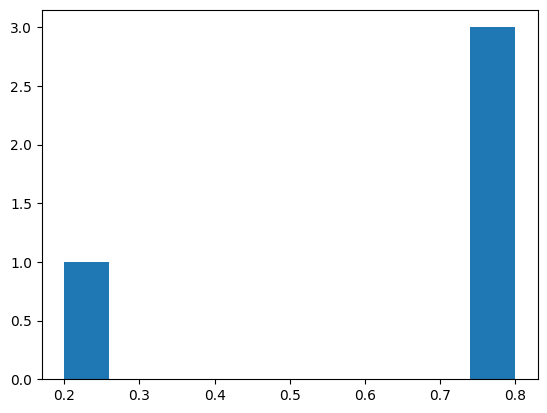

In [59]:
plt.hist(cdists[2])

In [41]:
spearmanr([1,2], [1,3])

SignificanceResult(statistic=0.9999999999999999, pvalue=nan)

In [35]:
alldata = load_jsons()

In [36]:
alldata['sft']['dpo13b']

,question,response,answers,atoks,ttoks,scores
0,Below is an instruction that describes a task....,[Question: Detailed Instructions: In this task...,"[ When did Bailey receive the award?, When di...","[10, 10, 21, 10]","[170, 170, 181, 170]","[-3.3044234864474578, -3.3044234864474578, -3...."
1,Below is an instruction that describes a task....,"[Question: hi, iam going to provide you with a...",[ Sure thing! I look forward to learning more ...,"[15, 11, 21, 5]","[101, 97, 107, 91]","[-3.9624329706165136, -4.236807813901923, -4.3..."
2,Below is an instruction that describes a task....,[Question: How would I connect AI or ML API’s ...,[ To connect your Artificial Intelligence (AI)...,"[108, 153, 131, 158]","[155, 200, 178, 205]","[-2.9773158046012345, -3.037522901219807, -3.1..."
3,Below is an instruction that describes a task....,[Question: 아래 책 내용 요약해줘 \n- 제목 : Don't Make Me...,[ Don't Make Me Think: A Common Sense Approach...,"[99, 69, 75, 98]","[170, 140, 146, 169]","[-1.8557471689073863, -2.115741455086986, -2.1..."
4,Below is an instruction that describes a task....,[Question: In this task you will be given an a...,[ What was the inspiration behind the Red Hot ...,"[22, 11, 19, 12]","[270, 259, 267, 260]","[-1.9034018721552346, -1.931842794775188, -1.9..."
...,...,...,...,...,...,...
166,Below is an instruction that describes a task....,"[Question: In this task, you need to reverse t...","[ a woman taking a swing at a tennis ball, Sw...","[11, 9, 3, 13]","[160, 158, 152, 162]","[-2.2985156318347304, -2.4563919640575755, -2...."
167,Below is an instruction that describes a task....,[Question: How can I calculate the sample size...,[ To calculate your sample size you need to co...,"[258, 182, 224, 161]","[356, 280, 322, 259]","[-2.398720095739945, -2.4949411640376304, -2.4..."
168,Below is an instruction that describes a task....,[Question: Given the task definition and input...,[ The moon shines by its own light; there's no...,"[23, 56, 34, 37]","[291, 324, 302, 305]","[-1.5449442571779264, -1.6387981213490963, -1...."
169,Below is an instruction that describes a task....,[Question: Can you update the C++ code snippet...,[ // Update the function to handle two additio...,"[57, 206, 202, 153]","[214, 363, 359, 310]","[-2.6710134707117645, -2.4282071478851353, -2...."
